In [1]:
from qcodes.instrument_drivers.stanford_research.SR830 import SR830
from qcodes.instrument_drivers.Keithley.Keithley_2400 import Keithley2400


import numpy as np
import qcodes as qc
import pandas
import matplotlib.pyplot as plt
import time

## Multidimensional scanning module
from qcodes.dataset import (
    LinSweep,
    Measurement,
    dond,
    experiments,
    initialise_or_create_database_at,
    load_by_run_spec,
    load_or_create_experiment,
    plot_dataset,
)

## Using interactive widget
from qcodes.interactive_widget import experiments_widget

import pandas as pd
from scipy.optimize import curve_fit

initialise_or_create_database_at("Thesis_PV.db")
def loader(id):
    data = load_by_run_spec(experiment_name = "Short Testing", captured_run_id = id)
    df = data.to_pandas_dataframe()
    return df



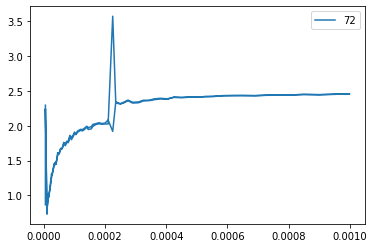

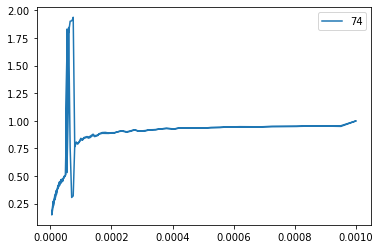

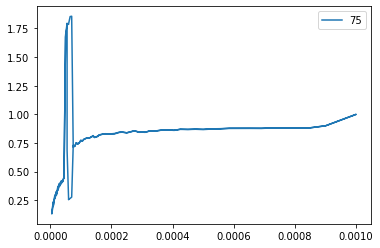

In [2]:
for i in [72, 74, 75]:
    df = loader(i)
    plt.plot(df['smu_volt'], df['smu_volt']/df['smu_curr'], label = i)
    plt.legend()
    plt.show()
#plt.ylim(0, 5)

#plt.show()
#plt.scatter(df['curr_time'][:5], df['smu_volt'][:5])

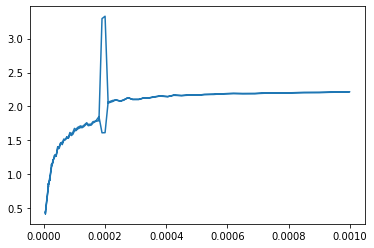

In [3]:
df = loader(66)
plt.plot(df['smu_volt'], df['smu_volt']/df['smu_curr'], label = 64)

In [4]:
df['smu_volt']

0      0.000005
1      0.000005
2      0.000005
3      0.000005
4      0.000005
         ...   
195    0.000005
196    0.000005
197    0.000005
198    0.000005
199    0.000005
Name: smu_volt, Length: 200, dtype: float64

In [5]:
df['smu_volt'][2]

5e-06

In [6]:
time.time()-max(df['curr_time'])

2744987.1925070286

In [7]:
def loader2(id):
    data = load_by_run_spec(experiment_name = "Temperature Testing", captured_run_id = id)
    df = data.to_pandas_dataframe()
    return df
from scipy.ndimage import gaussian_filter1d
df = loader2(78)
df['i'] = df['lia1_amplitude']/10**6
df['therm_temp'] = thermistor_res_to_temp(df['lia1_X']/df['i'])
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['temp'], label = 'internal')
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, gaussian_filter1d(df['therm_temp'], sigma = 20), label = 'on-chip')

#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['temp'], label = 'internal')
#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['therm_temp'], label = 'on-chip')
plt.ylim(103, 300)
plt.xlim(0, 420)
#plt.xlim(0, 50)
#plt.ylim(275, 300)
plt.hlines(xmin=0, xmax =  1e11, y = 170, color = 'r')
plt.legend()
plt.xlabel("Time Elapsed (Minutes)")
plt.ylabel("Temperature (K)")

NameError: name 'thermistor_res_to_temp' is not defined

In [ ]:
df['curr_time'][1]-df['curr_time'][0]

In [ ]:
def thermistor_res_to_temp(res):
    A = 3.9083*10**-3
    R0 = 100
    temp = (res/R0 - 1)/A + 273.15
    return temp
    

In [ ]:
def thermistor_temp_to_res(t):
    t = t-273.15
    A = 3.9083e-3
    B = -5.775e-7 
    C = -4.183e-12
    R0 = 100
    R = R0*(1+A*t+B*t**2+C*(t-100)*t**3)
    return R

In [ ]:
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, gaussian_filter1d(df['lia1_X']/df['i'], sigma = 20), label = 'on-chip')
df['therm_res'] = thermistor_temp_to_res(gaussian_filter1d(df['therm_temp'], sigma = 20))
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['therm_res'], color = 'g')
#plt.ylim(105, 110)
#plt.xlim(0, 50)

In [ ]:
df = loader2(79)
df['i'] = df['lia1_amplitude']/10**6
df['therm_temp'] = thermistor_res_to_temp(df['lia1_X']/df['i'])
plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['temp'], label = 'internal')
#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, gaussian_filter1d(df['therm_temp'], sigma = 20), label = 'on-chip')

#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['temp'], label = 'internal')
#plt.plot((df['curr_time']-df['curr_time'][0])/60-5, df['therm_temp'], label = 'on-chip')
#plt.ylim(103, 300)
#plt.xlim(0, 420)
#plt.xlim(0, 50)
#plt.ylim(275, 300)
#plt.hlines(xmin=0, xmax =  1e11, y = 170, color = 'r')
plt.legend()
plt.xlim(80, 120)
plt.ylim(100, 140)
plt.xlabel("Time Elapsed (Minutes)")
plt.ylabel("Temperature (K)")

In [ ]:
from scipy.optimize import curve_fit
def decay_exp(x, a, b, c):
    return a+be**(cx)

In [ ]:
df = loader2(99)
plt.scatter(df['curr_time'], gaussian_filter1d(df['lia1_X'], 50))
plt.scatter(df['curr_time'], gaussian_filter1d(df['lia1_Y'], 50))

In [ ]:
df

In [ ]:
df = loader2(113) # chopper sppinning, 
plt.scatter(df['curr_time'], df['lia1_X'])
print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

In [ ]:
df = loader2(116) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['lia1_X'])
print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

-2.4267670500000006e-07 -7.054690592105263e-08


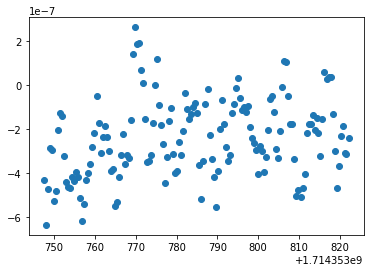

In [8]:
df = loader2(118) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['lia1_X'])
print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

In [9]:
df = loader2(121) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['lia1_X'])
print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

NameError: No run matching the supplied information found.

In [14]:
def loader(id):
    data = load_by_run_spec(experiment_name = "Polarization Dependence", captured_run_id = id)
    df = data.to_pandas_dataframe()
    return df

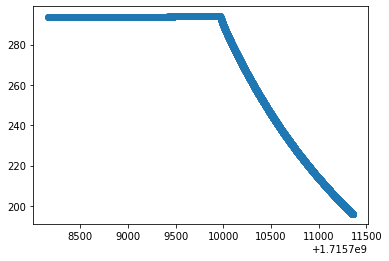

In [26]:
df = loader(122) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['temp'])
#print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))

In [27]:
df

,curr_time,lia1_R,lia1_X,lia1_Y,lia1_amplitude,lia1_phase,lia1_sensitivity,temp
0,1.715708e+09,0.000083,0.000083,-1.549730e-06,0.1,-1.056,0.0010,293.6
1,1.715708e+09,0.000086,0.000086,-1.013290e-06,0.1,-0.648,0.0010,293.6
2,1.715708e+09,0.000085,0.000085,-8.940730e-07,0.1,-0.588,0.0010,293.6
3,1.715708e+09,0.000085,0.000085,-5.364450e-07,0.1,-0.336,0.0010,293.6
4,1.715708e+09,0.000085,0.000085,4.768410e-07,0.1,0.360,0.0010,293.6
...,...,...,...,...,...,...,...,...
6175,1.715711e+09,0.000103,0.000103,-8.642710e-07,0.1,-0.474,0.0005,196.2
6176,1.715711e+09,0.000103,0.000103,-1.132500e-06,0.1,-0.624,0.0005,196.2
6177,1.715711e+09,0.000103,0.000103,-1.013290e-06,0.1,-0.558,0.0005,196.2
6178,1.715711e+09,0.000102,0.000102,-8.940730e-07,0.1,-0.492,0.0005,196.2


In [28]:
load_R = 10**6
df['i'] = df['lia1_amplitude']/load_R
df['sample_res'] = df['lia1_X']/df['i']
df

,curr_time,lia1_R,lia1_X,lia1_Y,lia1_amplitude,lia1_phase,lia1_sensitivity,temp,i,sample_res
0,1.715708e+09,0.000083,0.000083,-1.549730e-06,0.1,-1.056,0.0010,293.6,1.000000e-07,833.278
1,1.715708e+09,0.000086,0.000086,-1.013290e-06,0.1,-0.648,0.0010,293.6,1.000000e-07,856.523
2,1.715708e+09,0.000085,0.000085,-8.940730e-07,0.1,-0.588,0.0010,293.6,1.000000e-07,845.199
3,1.715708e+09,0.000085,0.000085,-5.364450e-07,0.1,-0.336,0.0010,293.6,1.000000e-07,850.563
4,1.715708e+09,0.000085,0.000085,4.768410e-07,0.1,0.360,0.0010,293.6,1.000000e-07,851.159
...,...,...,...,...,...,...,...,...,...,...
6175,1.715711e+09,0.000103,0.000103,-8.642710e-07,0.1,-0.474,0.0005,196.2,1.000000e-07,1027.590
6176,1.715711e+09,0.000103,0.000103,-1.132500e-06,0.1,-0.624,0.0005,196.2,1.000000e-07,1026.400
6177,1.715711e+09,0.000103,0.000103,-1.013290e-06,0.1,-0.558,0.0005,196.2,1.000000e-07,1025.500
6178,1.715711e+09,0.000102,0.000102,-8.940730e-07,0.1,-0.492,0.0005,196.2,1.000000e-07,1024.910


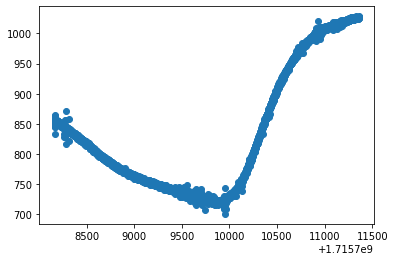

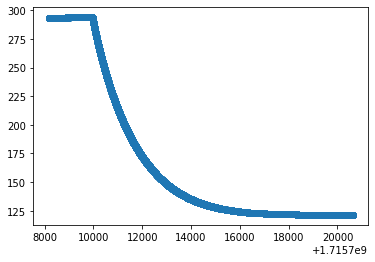

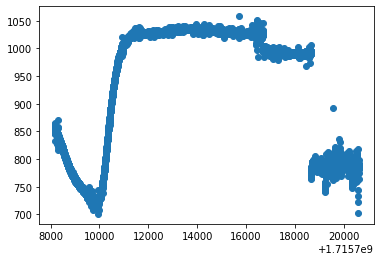

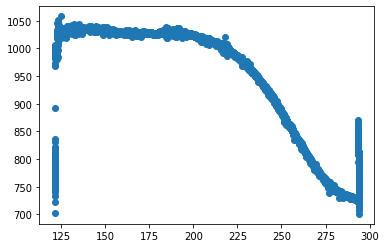

In [33]:
df = loader(122) # chopper sppinning, panlel i n path, 
plt.scatter(df['curr_time'], df['temp'])
#print(np.mean(df['lia1_X']), np.mean(df['lia1_Y']))
plt.show()

load_R = 10**6
df['i'] = df['lia1_amplitude']/load_R
df['sample_res'] = df['lia1_X']/df['i']


plt.scatter(df['curr_time'], df['sample_res'])
plt.show()
plt.scatter(df['temp'], df['sample_res'])

In [ ]:
for i in [13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]:
    df = loader(i)
    plt.plot(df['curr_time'], df['lia1_X'])
    plt.plot(df['curr_time'], df['lia1_Y'])
    plt.show()

In [ ]:
# initialise_or_create_database_at("Thesis_PV.db")
def loader(id):
    data = load_by_run_spec(experiment_name = "PV Measurements", captured_run_id = id)
    df = data.to_pandas_dataframe()
    return df